## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 06 : Instance Based Learning </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Start: 		2023-10-05 20:47:12.636101
Device ID: 	afcdbfb8-6385-11ee-9f84-2c3b70a37f3c



---

### Dataset yang dipakai:

1. data.csv - sumber : ttps://www.kaggle.com/datasets/weinoose/migraine-classification

---


### Deskripsi Dataset

data.csv adalah kumpulan data yang digunakan untuk mengklasifikasikan migrain berdasarkan berbagai atribut atau fitur. Data ini mencakup berbagai informasi seperti usia pasien (Age), durasi serangan migrain (Duration), frekuensi serangan (Frequency), lokasi sakit kepala (Location), karakteristik nyeri (Character), intensitas nyeri (Intensity), serta gejala seperti mual (Nausea), muntah (Vomit), sensitivitas suara (Phonophobia), dan sensitivitas cahaya (Photophobia).

### Hasil kerja

#### Importing system library

In [3]:
import sys

#### Importing numpy library

In [4]:
!pip install mglearn

In [5]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

X.shape: (26, 2)


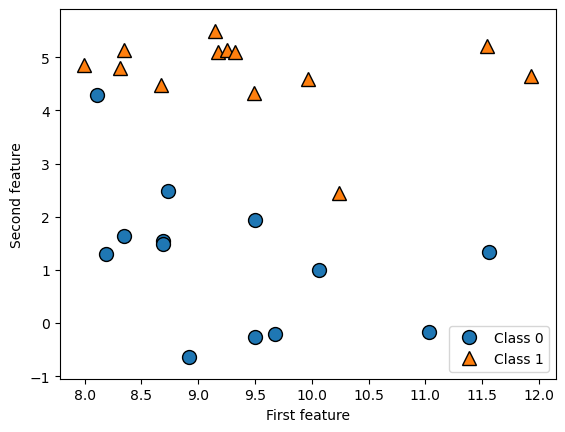

In [6]:
X, y =  mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Target:  [0 2 0 0 2 1 0 1 1 1 2 2 2 0 0 1 1 2 0 2 0 1 2 1 0 1]
X.shape: (26, 2)


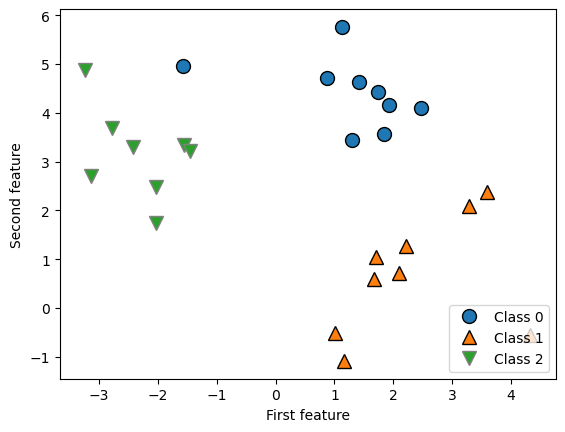

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=26, n_features=2, random_state=0)


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1", "Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("Target: ", y)
print("X.shape: {}".format(X.shape))


Text(0, 0.5, 'Target')

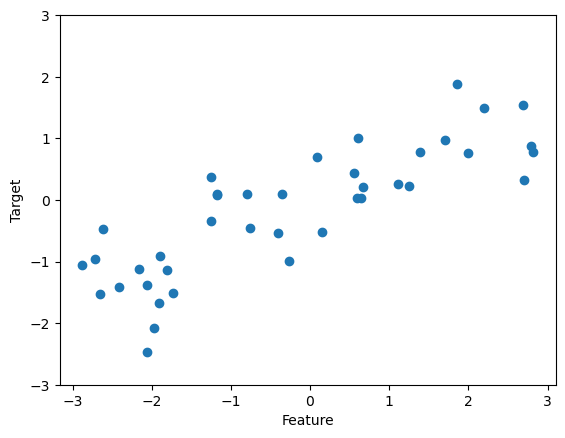

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [9]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('data.csv')

# Mendapatkan judul tabel dalam bentuk array
judul_tabel = data.columns.values

print(judul_tabel)


['Age' 'Duration' 'Frequency' 'Location' 'Character' 'Intensity' 'Nausea'
 'Vomit' 'Phonophobia' 'Photophobia' 'Visual' 'Sensory' 'Dysphasia'
 'Dysarthria' 'Vertigo' 'Tinnitus' 'Hypoacusis' 'Diplopia' 'Defect'
 'Ataxia' 'Conscience' 'Paresthesia' 'DPF' 'Type']


In [10]:
print("Type: \n{}" .format(data.columns))

Type: 
Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')


In [11]:
data.shape

(400, 24)

In [12]:
print("Type: \n{}" .format(data.columns))

Type: 
Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')


In [13]:
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [14]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


# Misalkan kolom target Anda bernama 'target'
y = data['Type']

# Hapus kolom target dari DataFrame untuk mendapatkan fitur
X_data = data.drop('Type', axis=1)

# Konversi DataFrame fitur ke array NumPy
X = X_data.values

# Membuat fitur polinomial dan interaksi
poly = PolynomialFeatures(degree=2, include_bias=False)
X_extended = poly.fit_transform(X)

print("X.shape: {}".format(X_extended.shape))

# Lakukan one-hot encoding pada kolom target
y_encoded = pd.get_dummies(y)


X.shape: (400, 299)


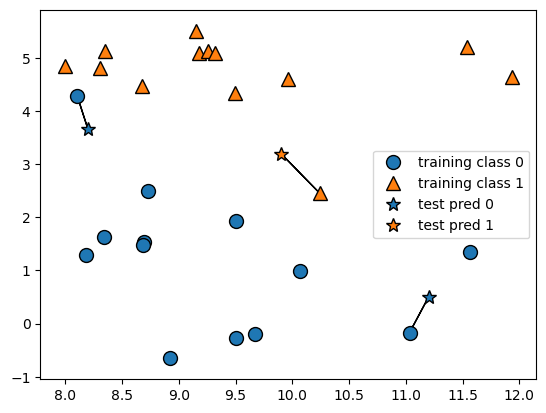

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

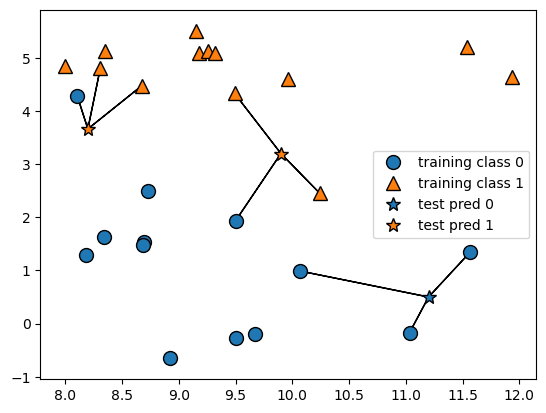

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 10:12].values
y = data.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
print("Test set: \n{} \n{}\n".format(X_test, y_test))
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set: 
[[3 0]
 [2 0]
 [2 2]
 [2 0]
 [1 0]
 [0 0]
 [2 0]
 [1 0]
 [2 0]
 [2 1]
 [0 0]
 [3 0]
 [2 0]
 [1 0]
 [3 0]
 [0 0]
 [2 0]
 [1 0]
 [2 0]
 [1 0]
 [2 0]
 [2 0]
 [2 0]
 [3 2]
 [1 0]
 [2 0]
 [2 1]
 [2 0]
 [0 1]
 [1 0]
 [2 0]
 [0 0]
 [2 1]
 [1 0]
 [2 0]
 [2 1]
 [2 0]
 [1 0]
 [2 0]
 [1 0]
 [2 0]
 [2 0]
 [2 0]
 [2 1]
 [0 0]
 [0 0]
 [1 2]
 [1 0]
 [2 0]
 [1 0]
 [0 0]
 [1 1]
 [2 0]
 [2 0]
 [2 0]
 [3 0]
 [0 0]
 [3 2]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [4 0]
 [3 0]
 [2 0]
 [1 0]
 [1 0]
 [0 0]
 [2 0]
 [0 0]
 [2 2]
 [2 0]
 [2 0]
 [0 0]
 [2 1]
 [2 0]
 [3 2]
 [0 1]
 [3 0]
 [1 0]
 [2 0]
 [2 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [3 0]
 [1 0]
 [3 2]] 
[1 2 1 5 2 5 1 1 1 2 5 2 5 2 5 5 3 5 2 1 1 1 3 2 1 2 4 5 2 2 3 2 1 2 1 4 5
 1 1 1 2 2 5 5 1 4 1 2 1 2 2 1 3 4 1 1 5 2 7 5 1 1 1 1 5 5 1 1 1 1 1 1 5 5
 1 5 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 5 5 5 3 5 2 1 5]

Test set predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1

In [21]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.45


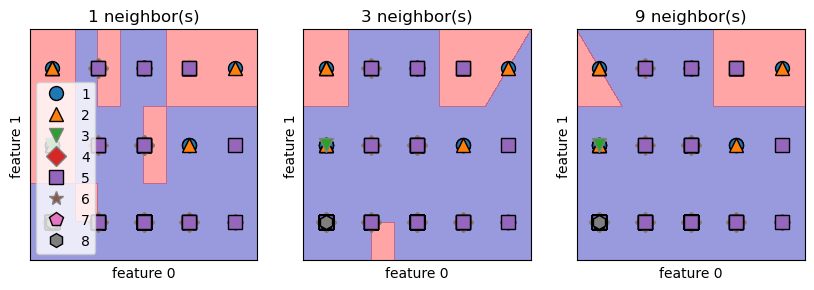

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
    

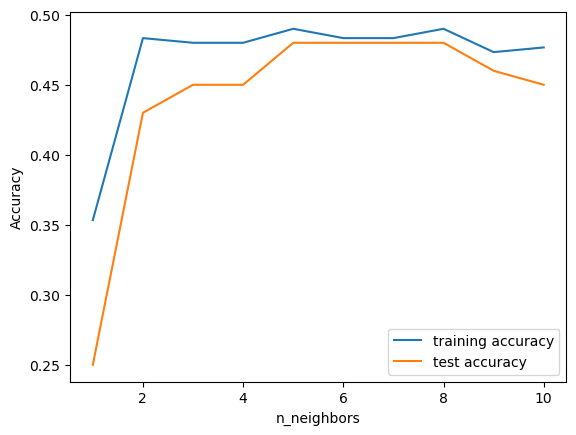

In [23]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

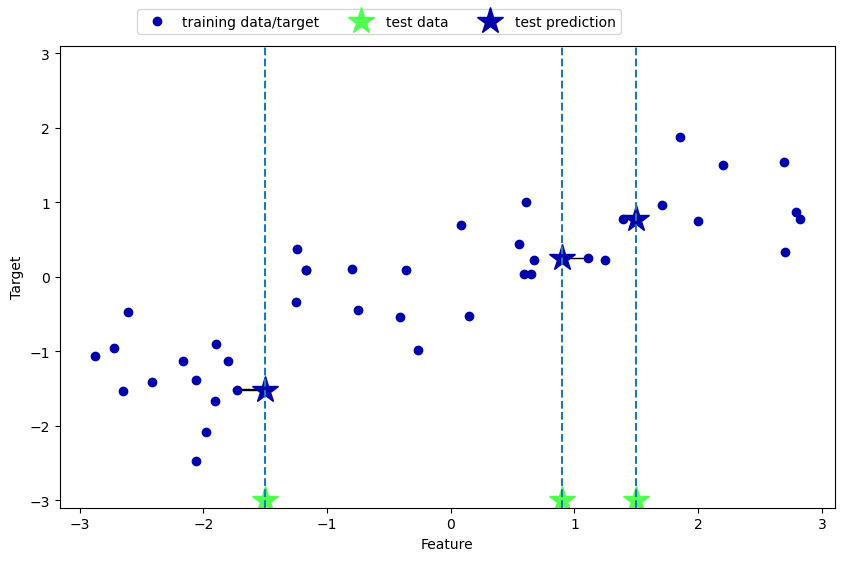

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

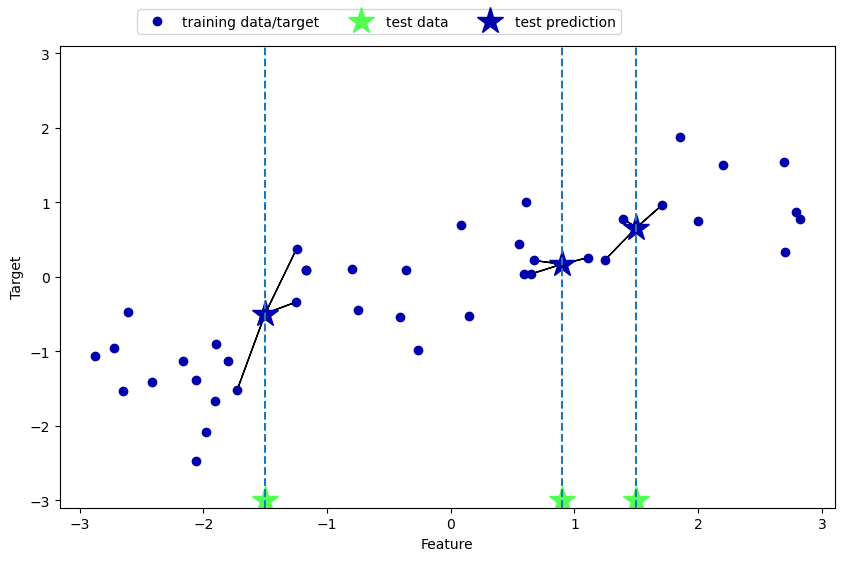

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X = data.iloc[:, 10:12].values
y = data.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("Test Set: \n{} \n{}\n".format(X_test, y_test))
print("Test Set Predictions: \n{}".format(reg.predict(X_test)))

Test Set: 
[[3 0]
 [2 0]
 [2 2]
 [2 0]
 [1 0]
 [0 0]
 [2 0]
 [1 0]
 [2 0]
 [2 1]
 [0 0]
 [3 0]
 [2 0]
 [1 0]
 [3 0]
 [0 0]
 [2 0]
 [1 0]
 [2 0]
 [1 0]
 [2 0]
 [2 0]
 [2 0]
 [3 2]
 [1 0]
 [2 0]
 [2 1]
 [2 0]
 [0 1]
 [1 0]
 [2 0]
 [0 0]
 [2 1]
 [1 0]
 [2 0]
 [2 1]
 [2 0]
 [1 0]
 [2 0]
 [1 0]
 [2 0]
 [2 0]
 [2 0]
 [2 1]
 [0 0]
 [0 0]
 [1 2]
 [1 0]
 [2 0]
 [1 0]
 [0 0]
 [1 1]
 [2 0]
 [2 0]
 [2 0]
 [3 0]
 [0 0]
 [3 2]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [4 0]
 [3 0]
 [2 0]
 [1 0]
 [1 0]
 [0 0]
 [2 0]
 [0 0]
 [2 2]
 [2 0]
 [2 0]
 [0 0]
 [2 1]
 [2 0]
 [3 2]
 [0 1]
 [3 0]
 [1 0]
 [2 0]
 [2 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [2 0]
 [2 0]
 [3 0]
 [1 0]
 [3 2]] 
[1 2 1 5 2 5 1 1 1 2 5 2 5 2 5 5 3 5 2 1 1 1 3 2 1 2 4 5 2 2 3 2 1 2 1 4 5
 1 1 1 2 2 5 5 1 4 1 2 1 2 2 1 3 4 1 1 5 2 7 5 1 1 1 1 5 5 1 1 1 1 1 1 5 5
 1 5 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 5 5 5 3 5 2 1 5]

Test Set Predictions: 
[2.         1.         2.66666667 1.         2.66666667 1.


In [27]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: -0.70


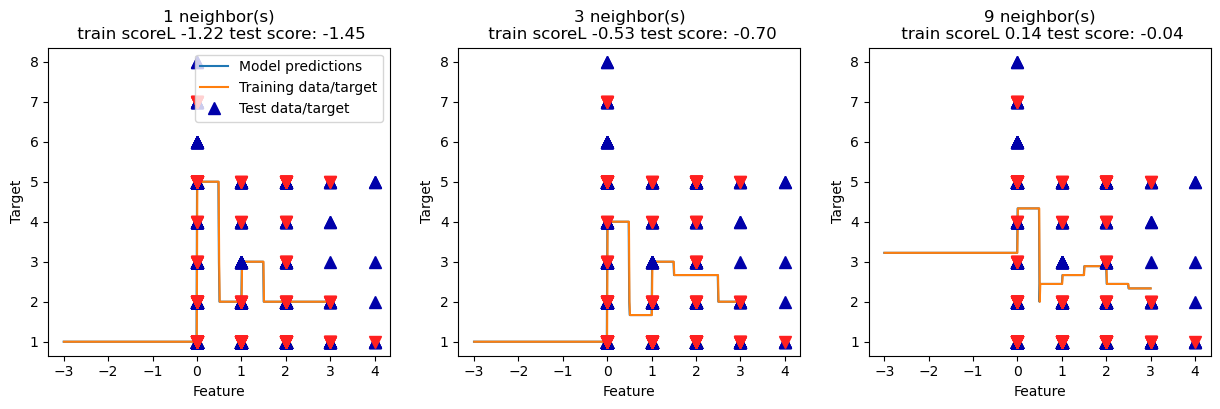

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 2)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train scoreL {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - hasil perhitungan akurasi menggunakan fungsi clf.score dari dataset data.csv dimana X adalah seluruh atribut dataset yang bernilai angka dan y yang berisi klasifikasinya bernilai 0.45, mengingat data ini  masih tergolong kecil maka akurasinya belum begitu bagus karena masih dibawah setengah.
    
    - grafik garis yang menggambarkan akurasi pelatihan (biru) dan pengujian (oranye) dari model k-nearest neighbors (k-NN) dengan jumlah tetangga yang berbeda (dari 2 hingga 10).
    Dari grafik garis biru dan orange, kita dapat mengamati hal berikut:
    Akurasi Pelatihan (biru): Garis biru menunjukkan akurasi pelatihan model. Seperti yang bisa kita lihat, akurasi pelatihan cenderung menurun seiring dengan peningkatan jumlah tetangga. Ini adalah perilaku yang diharapkan karena dengan peningkatan jumlah tetangga, model menjadi lebih sederhana dan cenderung underfit pada data pelatihan.
    Akurasi Pengujian (oranye): Garis oranye menunjukkan akurasi pengujian model. Akurasi pengujian cenderung meningkat seiring dengan peningkatan jumlah tetangga, mencapai puncaknya di sekitar 6 tetangga, dan kemudian mulai menurun. Ini menunjukkan bahwa model dengan 6 tetangga mungkin adalah model terbaik dari yang ditunjukkan dalam grafik ini, karena mencapai keseimbangan terbaik antara bias dan varians.
    
    - koefisien determina atau R^2 dari data.csv menurut perhitungan kode adalah -0.70, hal ini menunjukkan prediksi yang sanga buruk atau memang peletakan plot pada kode memnag belum sesuai sehingga menghasilkan hasil diluar 0 - 1
    
    - tiga plot scatter yang mewakili kinerja model k-nearest neighbors (k-NN) dengan jumlah tetangga yang berbeda: 1, 3, dan 9. Model k-NN menggambarkan bahawa
    1 Tetangga: Model dengan 1 tetangga tampaknya overfit pada data pelatihan, seperti ditunjukkan oleh skor pelatihan yang tinggi (1.22) tetapi skor tes yang lebih rendah (1.45). Ini adalah ciri khas model k-NN dengan nilai k rendah, karena mereka cenderung menangkap noise dalam data pelatihan.
    3 Tetangga: Model dengan 3 tetangga memiliki skor pelatihan yang lebih rendah (0.53) tetapi skor tes yang lebih tinggi (0.70) dibandingkan dengan model dengan 1 tetangga. Ini menunjukkan bahwa model ini lebih baik dalam menggeneralisasi data yang belum dilihat.
    9 Tetangga: Model dengan 9 tetangga memiliki skor pelatihan terendah (0.14) dan skor tes terendah (0.04). Ini bisa menjadi indikasi underfitting, di mana model terlalu sederhana untuk menangkap pola dasar dalam data.
    Kesimpulannya, di antara ketiga model ini, model dengan 3 tetangga tampaknya berkinerja terbaik karena mencapai keseimbangan antara fitting data pelatihan dan menggeneralisasi data baru. Namun, penyetelan lebih lanjut dari hyperparameter dan pra-pemrosesan data mungkin dapat meningkatkan hasil ini.

---

In [29]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-10-05 20:47:39.422207


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [32]:
!jupyter nbconvert --to html "./IF540L_Kelas_EL_laporan_M06_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_EL_laporan_M06_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 1005037 bytes to IF540L_Kelas_EL_laporan_M06_00000060236_Nisaul Fadhilah.html
